B站：同济子豪兄（https://space.bilibili.com/1900783）

微信公众号：人工智能小技巧

张子豪 2021-07-12

# 导入工具包

In [26]:
# opencv-python
import cv2

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

In [27]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入手部关键点检测模型

In [28]:
# 导入solution
mp_hands = mp.solutions.hands

# 导入模型
hands = mp_hands.Hands(static_image_mode=False,        # 是静态图片还是连续视频帧
                       max_num_hands=2,                # 最多检测几只手
                       min_detection_confidence=0.5,   # 置信度阈值，过滤低于该阈值的预测结果
                       min_tracking_confidence=0.5)    # 追踪阈值

# 导入绘图函数
mpDraw = mp.solutions.drawing_utils 

# 读入图像，输入模型，获取预测结果

In [29]:
# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('./images/camera1.jpg')

# 水平镜像翻转图像，使图中左右手与真实左右手对应
# 参数 1：水平翻转，0：竖直翻转，-1：水平和竖直都翻转
img = cv2.flip(img, 1)

# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 将RGB图像输入模型，获取预测结果
results = hands.process(img_RGB)

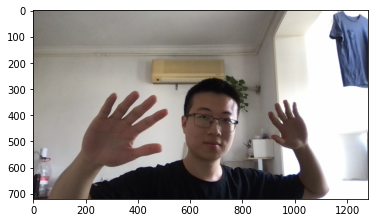

In [30]:
look_img(img)

# 分析模型输出结果

# 置信度和左右手

In [31]:
results.multi_handedness

[classification {
   index: 1
   score: 0.9999969601631165
   label: "Right"
 },
 classification {
   index: 0
   score: 0.9992804527282715
   label: "Left"
 }]

索引为0的手

In [32]:
results.multi_handedness[0].classification[0].score

0.9999969601631165

In [33]:
results.multi_handedness[0].classification[0].label

'Right'

索引为1的手

In [34]:
results.multi_handedness[1].classification[0].score

0.9992804527282715

In [35]:
results.multi_handedness[1].classification[0].label

'Left'

# 关键点坐标

In [36]:
# 预测出手的个数
len(results.multi_hand_landmarks)

2

In [37]:
# 所有手的所有关键点坐标
results.multi_hand_landmarks

[landmark {
   x: 0.7998640537261963
   y: 0.6971153616905212
   z: -2.102499274769798e-05
 }
 landmark {
   x: 0.7741467952728271
   y: 0.7154387831687927
   z: -0.024713240563869476
 }
 landmark {
   x: 0.7476515173912048
   y: 0.7063938975334167
   z: -0.038632672280073166
 }
 landmark {
   x: 0.7288751602172852
   y: 0.6845774054527283
   z: -0.05074572190642357
 }
 landmark {
   x: 0.7130364179611206
   y: 0.6694916486740112
   z: -0.06082608178257942
 }
 landmark {
   x: 0.746114194393158
   y: 0.6281778812408447
   z: -0.028161726891994476
 }
 landmark {
   x: 0.725554347038269
   y: 0.5929210782051086
   z: -0.04282597079873085
 }
 landmark {
   x: 0.715600311756134
   y: 0.5685001611709595
   z: -0.05421219766139984
 }
 landmark {
   x: 0.7077411413192749
   y: 0.5468289256095886
   z: -0.060694240033626556
 }
 landmark {
   x: 0.7597445249557495
   y: 0.6023263335227966
   z: -0.023808572441339493
 }
 landmark {
   x: 0.7408896684646606
   y: 0.556643009185791
   z: -0.034176

In [38]:
# 获取索引为0的手的关键点坐标
results.multi_hand_landmarks[0]

landmark {
  x: 0.7998640537261963
  y: 0.6971153616905212
  z: -2.102499274769798e-05
}
landmark {
  x: 0.7741467952728271
  y: 0.7154387831687927
  z: -0.024713240563869476
}
landmark {
  x: 0.7476515173912048
  y: 0.7063938975334167
  z: -0.038632672280073166
}
landmark {
  x: 0.7288751602172852
  y: 0.6845774054527283
  z: -0.05074572190642357
}
landmark {
  x: 0.7130364179611206
  y: 0.6694916486740112
  z: -0.06082608178257942
}
landmark {
  x: 0.746114194393158
  y: 0.6281778812408447
  z: -0.028161726891994476
}
landmark {
  x: 0.725554347038269
  y: 0.5929210782051086
  z: -0.04282597079873085
}
landmark {
  x: 0.715600311756134
  y: 0.5685001611709595
  z: -0.05421219766139984
}
landmark {
  x: 0.7077411413192749
  y: 0.5468289256095886
  z: -0.060694240033626556
}
landmark {
  x: 0.7597445249557495
  y: 0.6023263335227966
  z: -0.023808572441339493
}
landmark {
  x: 0.7408896684646606
  y: 0.556643009185791
  z: -0.034176502376794815
}
landmark {
  x: 0.7327820062637329
  y:

In [39]:
# 获取索引为1的手的关键点坐标
results.multi_hand_landmarks[1]

landmark {
  x: 0.1994442343711853
  y: 0.7421209812164307
  z: -4.914444070891477e-05
}
landmark {
  x: 0.2442730963230133
  y: 0.778552770614624
  z: -0.027949729934334755
}
landmark {
  x: 0.29576194286346436
  y: 0.7629284262657166
  z: -0.040609002113342285
}
landmark {
  x: 0.33661407232284546
  y: 0.7383625507354736
  z: -0.05118132755160332
}
landmark {
  x: 0.3742786645889282
  y: 0.7282493114471436
  z: -0.06178220361471176
}
landmark {
  x: 0.29547134041786194
  y: 0.6509174704551697
  z: -0.05283922329545021
}
landmark {
  x: 0.343487024307251
  y: 0.5963579416275024
  z: -0.07214706391096115
}
landmark {
  x: 0.370734304189682
  y: 0.5661497712135315
  z: -0.08614716678857803
}
landmark {
  x: 0.39476341009140015
  y: 0.5399014353752136
  z: -0.09915278106927872
}
landmark {
  x: 0.2688738703727722
  y: 0.6147351861000061
  z: -0.05496258661150932
}
landmark {
  x: 0.31107914447784424
  y: 0.5423687100410461
  z: -0.08370310813188553
}
landmark {
  x: 0.33693715929985046
 

索引为1的手的第20号关键点的坐标

In [40]:
results.multi_hand_landmarks[1].landmark[20]

x: 0.23963047564029694
y: 0.45261770486831665
z: -0.1349078267812729

In [41]:
results.multi_hand_landmarks[1].landmark[20].x

0.23963047564029694

In [42]:
# 获取图像宽高
h, w = img.shape[0], img.shape[1]

In [43]:
h

720

In [44]:
w

1280

In [45]:
results.multi_hand_landmarks[1].landmark[20].x * w

306.7270088195801

In [46]:
results.multi_hand_landmarks[1].landmark[20].y * h

325.884747505188

## 关键点之间的连接关系（骨架）

In [47]:
mp_hands.HAND_CONNECTIONS

frozenset({(<HandLandmark.WRIST: 0>, <HandLandmark.THUMB_CMC: 1>),
           (<HandLandmark.WRIST: 0>, <HandLandmark.INDEX_FINGER_MCP: 5>),
           (<HandLandmark.WRIST: 0>, <HandLandmark.PINKY_MCP: 17>),
           (<HandLandmark.THUMB_CMC: 1>, <HandLandmark.THUMB_MCP: 2>),
           (<HandLandmark.THUMB_MCP: 2>, <HandLandmark.THUMB_IP: 3>),
           (<HandLandmark.THUMB_IP: 3>, <HandLandmark.THUMB_TIP: 4>),
           (<HandLandmark.INDEX_FINGER_MCP: 5>,
            <HandLandmark.INDEX_FINGER_PIP: 6>),
           (<HandLandmark.INDEX_FINGER_MCP: 5>,
            <HandLandmark.MIDDLE_FINGER_MCP: 9>),
           (<HandLandmark.INDEX_FINGER_PIP: 6>,
            <HandLandmark.INDEX_FINGER_DIP: 7>),
           (<HandLandmark.INDEX_FINGER_DIP: 7>,
            <HandLandmark.INDEX_FINGER_TIP: 8>),
           (<HandLandmark.MIDDLE_FINGER_MCP: 9>,
            <HandLandmark.MIDDLE_FINGER_PIP: 10>),
           (<HandLandmark.MIDDLE_FINGER_MCP: 9>,
            <HandLandmark.RING_FINGER_MCP:

# 可视化检测结果

In [48]:
if results.multi_hand_landmarks: # 如果有检测到手
    # 遍历每一只检测出的手
    for hand_idx in range(len(results.multi_hand_landmarks)):
        hand_21 = results.multi_hand_landmarks[hand_idx] # 获取该手的所有关键点坐标
        mpDraw.draw_landmarks(img, hand_21, mp_hands.HAND_CONNECTIONS) # 可视化

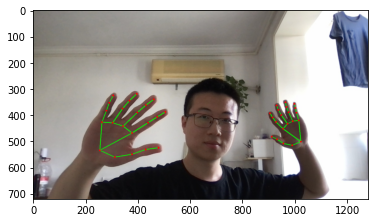

In [49]:
look_img(img)

# 整理代码

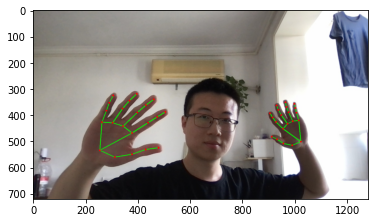

True

In [50]:
# opencv-python
import cv2

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()


# 导入solution
mp_hands = mp.solutions.hands
# 导入模型
hands = mp_hands.Hands(static_image_mode=False,        # 是静态图片还是连续视频帧
                       max_num_hands=4,                # 最多检测几只手
                       min_detection_confidence=0.5,   # 置信度阈值，过滤低于该阈值的预测结果
                       min_tracking_confidence=0.5)    # 追踪阈值
# 导入绘图函数
mpDraw = mp.solutions.drawing_utils 

# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('./images/camera1.jpg')

# 水平镜像翻转图像，使图中左右手与真实左右手对应
# 参数 1：水平翻转，0：竖直翻转，-1：水平和竖直都翻转
img = cv2.flip(img, 1)
# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 将RGB图像输入模型，获取预测结果
results = hands.process(img_RGB)
if results.multi_hand_landmarks: # 如果有检测到手
    # 遍历每一只检测出的手
    for hand_idx in range(len(results.multi_hand_landmarks)):
        hand_21 = results.multi_hand_landmarks[hand_idx] # 获取该手的所有关键点坐标
        mpDraw.draw_landmarks(img, hand_21, mp_hands.HAND_CONNECTIONS) # 可视化

look_img(img)

cv2.imwrite('C.jpg',img)